In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# df_one_hot = pd.get_dummies(df)
# df_one_hot

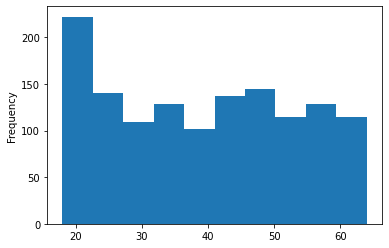

In [6]:
df_one_hot['age'].plot(kind='hist')

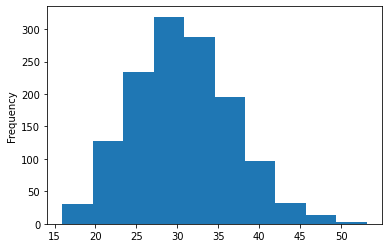

In [ ]:
df_one_hot['bmi'].plot(kind='hist')

In [ ]:
df_one_hot['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [16]:
category_col = ['sex', 'smoker', 'region']
num_col = ['age', 'bmi', 'children']

ct = make_column_transformer(
    (MinMaxScaler(), num_col),
    (OneHotEncoder(handle_unknown='ignore'), category_col)
)

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# X_train_normal[0]

In [15]:
X_train_normal.shape, y_train.shape

((1070, 11), (1070,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, )
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.mae,
              metrics=['mse'])

model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2024.0453 - mae: 2024.0453


[2024.0452880859375, 2024.0452880859375]

In [17]:
from sklearn.datasets import make_circles

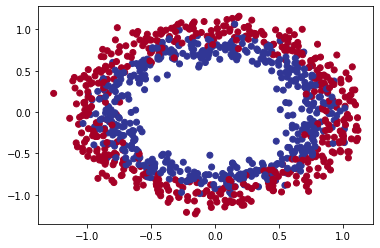

In [18]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.mae,
                metrics=['accuracy'])

model_1.fit(X_train, y_train, epochs=15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.4996 - accuracy: 0.4762
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.4888
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.4913
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.4888
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.5238
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.5962
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.7513
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.7975
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.8188
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.8112
Epoch 11/15
25/25 [

In [ ]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9900


[0.014078263193368912, 0.9900000095367432]